<a href="https://colab.research.google.com/github/ParsecInstitute/Astromatic2022/blob/main/Block4/MNISTClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [1]:
def mnist_grid(x, y):
  plt.style.use("dark_background")
  fig, axs = plt.subplots(10, 10, figsize=(10, 10))
  for i in range(10):
      for j in range(10):
          axs[i, j].imshow(x[y == i][j], cmap="gray")
          axs[i, j].axis("off")
  plt.subplots_adjust(wspace=0, hspace=-0.1)


# Download the dataset

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11501568/11490434 [==============================] - 0s 0us/step


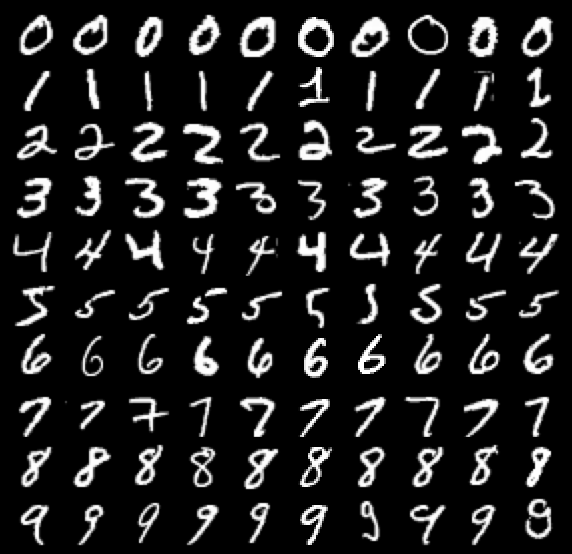

In [4]:
mnist_grid(x_train, y_train)

#Classification Problem

Given an image $\mathbf{x} \in \mathcal{X}$, we want to retrieve the label 
$\mathbf{y} \in \mathcal{Y}$. We define $\mathcal{Y}$ to be the space 
of one-hot encoded vector of labels in the set $\{0,\dots,9\}$.

We define $\mathbf{\hat{y}} = f_\varphi(\mathbf{x})$ with a CNN architecture. 
We use softmax activation to output the predicted label.

The loss function is the cross entropy
$$
  \mathcal{L}_\varphi = -\sum_{i=0}^{9} \mathbf{y}_i \log \mathbf{\hat{y}}_i
$$

In [5]:
# preprocessing

y_train_onehot = tf.cast(tf.one_hot(y_train, 10), tf.float32)
y_test_onehot = tf.cast(tf.one_hot(y_test, 10), tf.float32)

# normalize images in the range [0, 1] and add channel dimension
x_train = tf.cast(x_train[..., tf.newaxis], tf.float32) / 255
x_test = tf.cast(x_test[..., tf.newaxis], tf.float32) / 255

In [6]:
# Define model architecture

model = tf.keras.Sequential(
    [
     tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"), # in=[batch, 28, 28, 1], out=[batch, 14, 14, 16]
     tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"), # in=[batch, 14, 14, 16], out=[batch, 7, 7, 16]
     tf.keras.layers.Flatten(), # in=[batch, 7, 7, 16], out=[batch, 784]
     tf.keras.layers.Dense(units=50, activation="relu"), # in=[batch, 784], out=[batch, 50],
     tf.keras.layers.Dense(units=10, activation="softmax") # output layer
    ]
)

In [7]:
# Define optimizer, loss function and metric to track

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
  optimizer=optimizer,
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=[
           tf.keras.metrics.Precision(),
           tf.keras.metrics.AUC()
  ]
)

In [8]:
# Optimize the network

history = model.fit(
    x=x_train,
    y=y_train_onehot,
    batch_size=32,
    epochs=5,
    validation_split=0.1
)

Epoch 1/5
1688/1688 [==============================] - 17s 9ms/step - loss: 0.2801 - precision: 0.9470 - auc: 0.9938 - val_loss: 0.0949 - val_precision: 0.9783 - val_auc: 0.9986
Epoch 2/5
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0977 - precision: 0.9743 - auc: 0.9985 - val_loss: 0.0768 - val_precision: 0.9814 - val_auc: 0.9987
Epoch 3/5
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0673 - precision: 0.9813 - auc: 0.9990 - val_loss: 0.0622 - val_precision: 0.9859 - val_auc: 0.9987
Epoch 4/5
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0507 - precision: 0.9862 - auc: 0.9993 - val_loss: 0.0620 - val_precision: 0.9858 - val_auc: 0.9984
Epoch 5/5
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0420 - precision: 0.9881 - auc: 0.9994 - val_loss: 0.0564 - val_precision: 0.9868 - val_auc: 0.9987


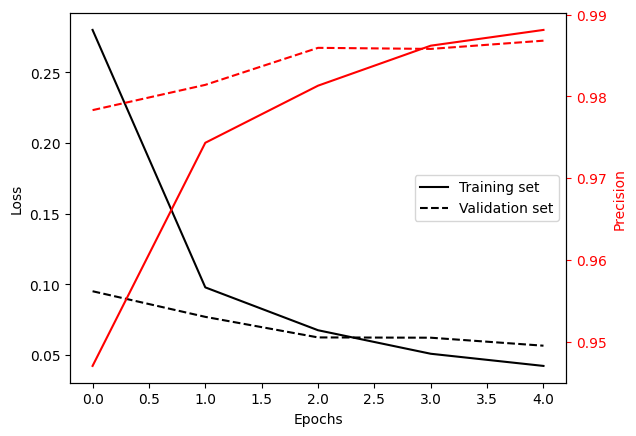

In [11]:
# Loss curve
plt.style.use("default")
plt.plot(history.history["loss"], color="k", label="Training set")
plt.plot(history.history["val_loss"], "k--", label="Validation set")
plt.legend(loc=5)
plt.ylabel("Loss")
plt.xlabel("Epochs")

ax2 = plt.gca().twinx()
ax2.set_ylabel("Precision", color="r")
ax2.tick_params(axis='y', which="both", colors="r")
plt.plot(history.history["precision"], color="r", label="Train loss")
plt.plot(history.history["val_precision"], "r--", label="Val loss")

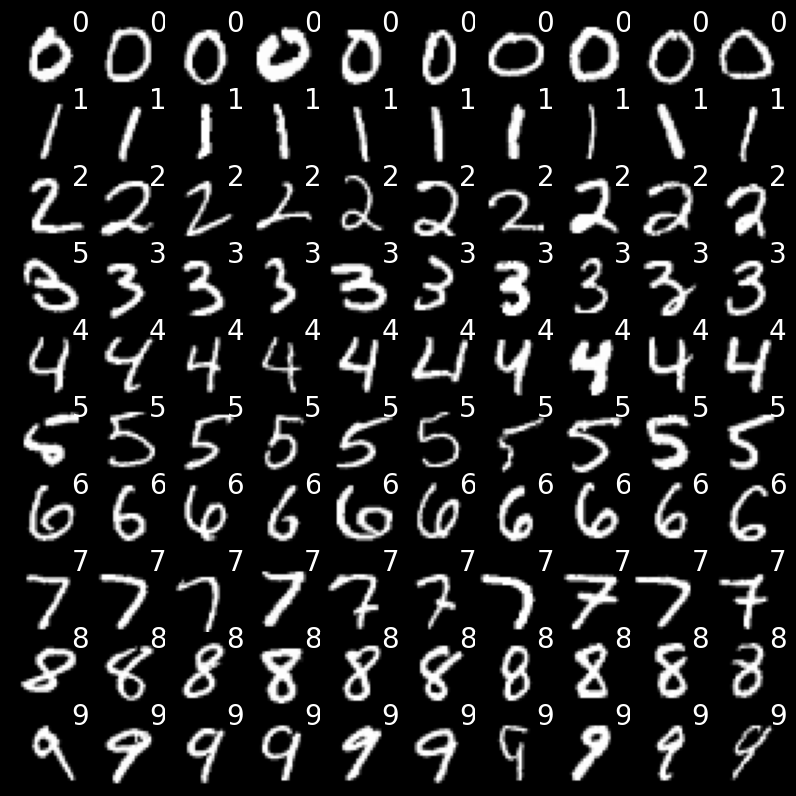

In [14]:
# showcase prediction on test set

plt.style.use("dark_background")
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        example = x_test[y_test == i][j]
        axs[i, j].imshow(example[..., 0], cmap="gray")
        prediction = np.argmax(model(example[None, ...]))
        axs[i, j].annotate(f"{prediction}", xy=(0.8, 0.8), xycoords="axes fraction", fontsize=20)
        axs[i, j].axis("off")
plt.subplots_adjust(wspace=0, hspace=0)